# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

La tarea es identificar qué factores influyen en el precio de un auto usado para que un concesionario ajuste su inventario. Desde una perspectiva de datos, esto implica formular un problema de regresión en el que el precio del auto es la variable dependiente, y todas las demás características (marca, modelo, año, kilometraje, tipo de combustible, etc.) son las variables independientes.

1. Comprensión del Negocio (Business Understanding)
Descripción del Problema: Has definido claramente el problema como una tarea de regresión para predecir el precio de un auto basado en características específicas.
Reformulación como Problema de Datos: Has convertido el problema de negocio en una tarea de regresión donde el precio es la variable dependiente y las características del auto son las variables independientes.

# Comprensión del Negocio (Business Understanding)

## Descripción del Problema

El objetivo de este proyecto es identificar los factores que influyen en el precio de un auto usado. A partir de un conjunto de datos proporcionado, que contiene información sobre 426,000 autos usados, debemos construir modelos que permitan predecir el precio de un auto en función de sus características.

Desde una perspectiva empresarial, los concesionarios de autos usados buscan comprender qué factores afectan más el precio de un auto para optimizar su inventario y ajustar sus estrategias de venta. Por ejemplo, podrían estar interesados en saber si el año del auto, el kilometraje, la marca, o el tipo de combustible tienen un impacto significativo en el precio.

## Reformulación como Problema de Datos

Para abordar el problema desde una perspectiva de datos, lo formulamos como una tarea de regresión. En este caso:

- **Variable Dependiente (Target):** `price` - El precio del auto, que queremos predecir.
- **Variables Independientes (Features):** Todas las demás características del auto, tales como:
  - `year` - Año del auto
  - `mileage` - Kilometraje del auto
  - `brand` - Marca del auto
  - `fuel_type` - Tipo de combustible del auto
  - `car_age` - Edad del auto (una característica derivada del año del auto)

El problema se convierte en entrenar un modelo de regresión que pueda aprender la relación entre estas características y el precio del auto. Esta formulación nos permitirá utilizar técnicas estadísticas y de aprendizaje automático para identificar los factores más influyentes y realizar predicciones precisas.

## Objetivos del Análisis

1. **Identificar Factores Clave:** Determinar qué características tienen el mayor impacto en el precio de un auto.
2. **Desarrollar Modelos Predictivos:** Construir y evaluar modelos de regresión para predecir el precio del auto con base en sus características.
3. **Hacer Recomendaciones:** Proporcionar recomendaciones a los concesionarios sobre cómo ajustar su inventario y estrategias de precios en función de los factores identificados.

Este enfoque asegura que nuestras técnicas de análisis y modelado estén alineadas con los objetivos comerciales y brinden valor práctico a los concesionarios de autos usados.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

2. Comprensión de los Datos (Data Understanding)
Exploración Inicial: Has descrito pasos importantes para conocer el conjunto de datos, como la carga de datos, inspección inicial, y verificación de valores faltantes y atípicos.
Inspección y Análisis: Asegúrate de haber realizado todas las inspecciones necesarias y documentado cualquier hallazgo importante.

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Ruta del archivo
file_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Leer las primeras filas para inspeccionar el delimitador y la estructura
try:
    preview = pd.read_csv(file_path, nrows=5)  # Lee solo las primeras 5 filas
    print("Vista previa del archivo:")
    print(preview.head())
except Exception as e:
    print(f"Error al leer las primeras filas del archivo: {e}")

# Determinar el delimitador y cargar el archivo completo
try:
    # Intenta cargar el archivo con delimitador por defecto (coma)
    df = pd.read_csv(file_path)
    print("Información del DataFrame:")
    print(df.info())
    print("Descripción estadística del DataFrame:")
    print(df.describe())
    print("Primeras filas del DataFrame:")
    print(df.head())
except pd.errors.ParserError:
    print("Error de análisis: Parece que el delimitador es incorrecto.")
    # Probar con otros delimitadores si es necesario
    delimiters = [',', ';', '\t']
    for delimiter in delimiters:
        try:
            df = pd.read_csv(file_path, sep=delimiter)
            print(f"Cargado con delimitador '{delimiter}':")
            print(df.info())
            print(df.describe())
            print(df.head())
            break
        except Exception as e:
            print(f"Error con delimitador '{delimiter}': {e}")
except Exception as e:
    print(f"Error al cargar el archivo completo: {e}")


Vista previa del archivo:
           id                  region  price  year  manufacturer  model  \
0  7222695916                prescott   6000   NaN           NaN    NaN   
1  7218891961            fayetteville  11900   NaN           NaN    NaN   
2  7221797935            florida keys  21000   NaN           NaN    NaN   
3  7222270760  worcester / central MA   1500   NaN           NaN    NaN   
4  7210384030              greensboro   4900   NaN           NaN    NaN   

   condition  cylinders  fuel  odometer  title_status  transmission  VIN  \
0        NaN        NaN   NaN       NaN           NaN           NaN  NaN   
1        NaN        NaN   NaN       NaN           NaN           NaN  NaN   
2        NaN        NaN   NaN       NaN           NaN           NaN  NaN   
3        NaN        NaN   NaN       NaN           NaN           NaN  NaN   
4        NaN        NaN   NaN       NaN           NaN           NaN  NaN   

   drive  size  type  paint_color state  
0    NaN   NaN   NaN    

Para conocer mejor el conjunto de datos, debes seguir estos pasos:

Carga de Datos: Utiliza pandas para cargar tu archivo de Excel.
Inspección Inicial: Visualiza las primeras filas del dataset con .head() para entender la estructura de los datos.
Resumen Estadístico: Usa .describe() para obtener estadísticas descriptivas de las columnas numéricas.
Tipos de Datos: Verifica los tipos de datos usando .info() para identificar cualquier tipo de dato inconsistente.
Valores Faltantes y Atípicos: Revisa la cantidad de valores nulos con .isnull().sum() y busca valores atípicos con visualizaciones como boxplots.

3. Preparación de los Datos (Data Preparation)
Limpieza y Transformación: Has manejado valores faltantes, convertido variables categóricas y creado nuevas características, como la edad del auto.
Escalado de Datos: Has incluido técnicas de escalado para las características numéricas.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

En esta etapa, limpias y transformas los datos para prepararlos para el modelado:

Manejo de Valores Faltantes: Decide cómo tratar los valores nulos (imputación o eliminación).
Conversión de Variables Categóricas: Utiliza técnicas como One-Hot Encoding para convertir variables categóricas en variables numéricas.
Creación de Nuevas Características: Por ejemplo, transformar "año" en "edad del auto".
Escalado de Datos: Normaliza o estandariza las características numéricas, especialmente si estás utilizando modelos basados en distancias (por ejemplo, Regresión Lineal).

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Version Normal:

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ruta completa del archivo
data_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Cargar datos
df = pd.read_csv(data_path)

# Crear nueva característica "edad del auto"
df['car_age'] = pd.Timestamp.now().year - df['year']

# Definir columnas numéricas y categóricas
num_features = ['year', 'odometer', 'car_age']
cat_features = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Preparar el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Imputar valores numéricos faltantes con la mediana
            ('scaler', StandardScaler())  # Estandarizar características numéricas
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores categóricos faltantes con el valor más frecuente
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convertir categorías en variables dummy
        ]), cat_features)
    ])

# Separar variables independientes (X) y dependiente (y)
X = df.drop('price', axis=1)
y = df['price']

# Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = model.score(X_test, y_test)
    return mae, rmse, r2

# Evaluar modelos
for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} - MAE: {mae:.2f}")
    print(f"{name} - RMSE: {rmse:.2f}")
    print(f"{name} - R^2: {r2:.2f}\n")

# Grid Search para XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Mejores parámetros para XGBoost: {best_params}")
print(f"Mejor puntuación en GridSearchCV: {best_score:.2f}")


Linear Regression - MAE: 345098.56
Linear Regression - RMSE: 19818938.18
Linear Regression - R^2: -0.00



KeyboardInterrupt: 

Version Optimizada:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ruta completa del archivo
data_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Cargar datos
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"El archivo en la ruta {data_path} no se encontró.")
except pd.errors.EmptyDataError:
    raise ValueError("El archivo está vacío.")
except pd.errors.ParserError:
    raise ValueError("Error al parsear el archivo. Asegúrate de que esté en formato CSV correcto.")

# Verificación inicial de los datos
print("Primeras filas de los datos:")
print(df.head())
print("\nInformación de los datos:")
print(df.info())
print("\nResumen estadístico de los datos:")
print(df.describe())

# Crear nueva característica "edad del auto"
df['car_age'] = pd.Timestamp.now().year - df['year']

# Definir columnas numéricas y categóricas
num_features = ['year', 'odometer', 'car_age']
cat_features = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Preparar el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

# Separar variables independientes (X) y dependiente (y)
X = df.drop('price', axis=1)
y = df['price']

# Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = model.score(X_test, y_test)
    return mae, rmse, r2

# Evaluar modelos
for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} - MAE: {mae:.2f}")
    print(f"{name} - RMSE: {rmse:.2f}")
    print(f"{name} - R^2: {r2:.2f}\n")

# Grid Search para XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Mejores parámetros para XGBoost: {best_params}")
print(f"Mejor puntuación en GridSearchCV: {best_score:.2f}")

4. Modelado (Modeling)
Construcción y Evaluación de Modelos: Has construido varios modelos de regresión, incluyendo Regresión Lineal, Random Forest, y XGBoost.
Validación Cruzada y Optimización: Has utilizado validación cruzada y GridSearchCV para ajustar los hiperparámetros.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Ahora, construyes varios modelos de regresión para predecir el precio del auto:

División del Conjunto de Datos: Divide los datos en conjuntos de entrenamiento y prueba.
Construcción de Modelos: Prueba diferentes modelos de regresión (Regresión Lineal, Random Forest, XGBoost).
Validación Cruzada: Usa cross_val_score para validar los modelos.
Optimización de Hiperparámetros: Utiliza GridSearchCV para ajustar los hiperparámetros.

Version Normal:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Ruta completa del archivo
data_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Cargar datos
df = pd.read_csv(data_path)

# Crear nueva característica "edad del auto"
df['car_age'] = pd.Timestamp.now().year - df['year']

# Separar variables independientes (X) y dependiente (y)
X = df.drop('price', axis=1)
y = df['price']

# Definir características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines para el preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline para cada modelo
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor())])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor())])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validación Cruzada para Regresión Lineal
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Regresión Lineal CV RMSE: {(-cv_scores_lr.mean())**0.5}")

# Validación Cruzada para Random Forest
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV RMSE: {(-cv_scores_rf.mean())**0.5}")

# Optimización de Hiperparámetros para XGBoost con GridSearchCV
param_grid_xgb = {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [3, 5], 'regressor__learning_rate': [0.01, 0.1]}
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

print(f"Mejores Hiperparámetros para XGBoost: {grid_search_xgb.best_params_}")

# Evaluación del mejor modelo de XGBoost en el conjunto de prueba
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

Regresión Lineal CV RMSE: 9547858.153461352


Version Optimizada:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Ruta completa del archivo
data_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Cargar datos
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"El archivo en la ruta {data_path} no se encontró.")
except pd.errors.EmptyDataError:
    raise ValueError("El archivo está vacío.")
except pd.errors.ParserError:
    raise ValueError("Error al parsear el archivo. Asegúrate de que esté en formato CSV correcto.")

# Crear nueva característica "edad del auto"
df['car_age'] = pd.Timestamp.now().year - df['year']

# Separar variables independientes (X) y dependiente (y)
X = df.drop('price', axis=1)
y = df['price']

# Definir características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines para el preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline para cada modelo
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(random_state=42))])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validación Cruzada para Regresión Lineal
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Regresión Lineal CV RMSE: {(-cv_scores_lr.mean())**0.5:.2f}")

# Validación Cruzada para Random Forest
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV RMSE: {(-cv_scores_rf.mean())**0.5:.2f}")

# Optimización de Hiperparámetros para XGBoost con GridSearchCV
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1]
}
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

print(f"Mejores Hiperparámetros para XGBoost: {grid_search_xgb.best_params_}")

# Evaluación del mejor modelo de XGBoost en el conjunto de prueba
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R^2: {r2_xgb:.2f}")

5. Evaluación (Evaluation)
Métricas de Evaluación: Has calculado métricas como RMSE y R² para evaluar el rendimiento de los modelos.
Interpretación de Resultados: Reflexiona sobre cómo los resultados se relacionan con los factores que afectan el precio y cómo los modelos se pueden mejorar.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Reflexiona sobre qué modelos son de alta calidad:

Métricas de Evaluación: Calcula métricas como MAE, RMSE, R^2.
Interpretación de los Resultados: Evalúa qué características tienen más impacto en el precio y cómo mejoran los modelos con la optimización.

Version Normal:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Ruta completa del archivo
data_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Cargar datos
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"El archivo en la ruta {data_path} no se encontró.")
except pd.errors.EmptyDataError:
    raise ValueError("El archivo está vacío.")
except pd.errors.ParserError:
    raise ValueError("Error al parsear el archivo. Asegúrate de que esté en formato CSV correcto.")

# Crear nueva característica "edad del auto"
df['car_age'] = pd.Timestamp.now().year - df['year']

# Separar variables independientes (X) y dependiente (y)
X = df.drop('price', axis=1)
y = df['price']

# Definir características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines para el preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline para cada modelo
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(random_state=42))])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validación Cruzada para Regresión Lineal
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Regresión Lineal CV RMSE: {(-cv_scores_lr.mean())**0.5:.2f}")

# Validación Cruzada para Random Forest
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV RMSE: {(-cv_scores_rf.mean())**0.5:.2f}")

# Optimización de Hiperparámetros para XGBoost con GridSearchCV
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1]
}
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

print(f"Mejores Hiperparámetros para XGBoost: {grid_search_xgb.best_params_}")

# Evaluación de los Modelos en el Conjunto de Prueba
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Ajustar los modelos antes de evaluarlos
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# Evaluación del Modelo de Regresión Lineal
mae_lr, rmse_lr, r2_lr = evaluate_model(pipeline_lr, X_test, y_test)
print(f"Regresión Lineal - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R^2: {r2_lr:.2f}")

# Evaluación del Modelo Random Forest
mae_rf, rmse_rf, r2_rf = evaluate_model(pipeline_rf, X_test, y_test)
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}")

# Evaluación del Mejor Modelo de XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(best_xgb_model, X_test, y_test)
print(f"XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R^2: {r2_xgb:.2f}")

# Obtener importancia de características para Random Forest y XGBoost
def get_feature_importances(model):
    if hasattr(model.named_steps['regressor'], 'feature_importances_'):
        importances = model.named_steps['regressor'].feature_importances_
        feature_names = np.concatenate([
            model.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].get_feature_names_out(),
            model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
        ])
        return dict(zip(feature_names, importances))
    return {}

# Importancia de características
importances_rf = get_feature_importances(pipeline_rf)
importances_xgb = get_feature_importances(best_xgb_model)

print("Importancia de características en Random Forest:")
for feature, importance in sorted(importances_rf.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

print("Importancia de características en XGBoost:")
for feature, importance in sorted(importances_xgb.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Reflexión
print("\nReflexión:")
print("1. Compara las métricas MAE, RMSE y R² entre los modelos para identificar cuál tiene el mejor desempeño.")
print("2. Revisa la importancia de las características para entender qué variables afectan más al precio del automóvil.")
print("3. Considera si necesitas ajustar el preprocesamiento o la selección de características para mejorar el rendimiento de los modelos.")

Regresión Lineal CV RMSE: 9547858.153461352


Version Optimizada:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta completa del archivo
data_path = r'C:\Users\Alvaro\Desktop\Modulos Berkeley\Modulo 11\data\vehicles.csv'

# Cargar datos
try:
    df = pd.read_csv(data_path)
except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
    raise RuntimeError(f"Error al cargar el archivo: {e}")

# Crear nueva característica "edad del auto"
df['car_age'] = pd.Timestamp.now().year - df['year']

# Separar variables independientes (X) y dependiente (y)
X = df.drop('price', axis=1)
y = df['price']

# Definir características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines para el preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline para cada modelo
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(random_state=42))])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validación Cruzada para Regresión Lineal
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Regresión Lineal CV RMSE: {(-cv_scores_lr.mean())**0.5:.2f}")

# Validación Cruzada para Random Forest
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV RMSE: {(-cv_scores_rf.mean())**0.5:.2f}")

# Optimización de Hiperparámetros para XGBoost con GridSearchCV
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1]
}
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

print(f"Mejores Hiperparámetros para XGBoost: {grid_search_xgb.best_params_}")

# Evaluación de los Modelos en el Conjunto de Prueba
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Ajustar los modelos antes de evaluarlos
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# Evaluación del Modelo de Regresión Lineal
mae_lr, rmse_lr, r2_lr = evaluate_model(pipeline_lr, X_test, y_test)
print(f"Regresión Lineal - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R^2: {r2_lr:.2f}")

# Evaluación del Modelo Random Forest
mae_rf, rmse_rf, r2_rf = evaluate_model(pipeline_rf, X_test, y_test)
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}")

# Evaluación del Mejor Modelo de XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(best_xgb_model, X_test, y_test)
print(f"XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R^2: {r2_xgb:.2f}")

# Obtener importancia de características para Random Forest y XGBoost
def get_feature_importances(model):
    if hasattr(model.named_steps['regressor'], 'feature_importances_'):
        importances = model.named_steps['regressor'].feature_importances_
        feature_names = np.concatenate([
            model.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].get_feature_names_out(),
            model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
        ])
        return dict(zip(feature_names, importances))
    return {}

# Importancia de características
importances_rf = get_feature_importances(pipeline_rf)
importances_xgb = get_feature_importances(best_xgb_model)

# Visualización de la importancia de características
def plot_feature_importances(importances, title):
    sorted_importances = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(sorted_importances.values()), y=list(sorted_importances.keys()))
    plt.title(title)
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.show()

print("Importancia de características en Random Forest:")
plot_feature_importances(importances_rf, "Importancia de Características en Random Forest")

print("Importancia de características en XGBoost:")
plot_feature_importances(importances_xgb, "Importancia de Características en XGBoost")

# Reflexión
print("\nReflexión:")
print("1. Compara las métricas MAE, RMSE y R² entre los modelos para identificar cuál tiene el mejor desempeño.")
print("2. Revisa la importancia de las características para entender qué variables afectan más al precio del automóvil.")
print("3. Considera si necesitas ajustar el preprocesamiento o la selección de características para mejorar el rendimiento de los modelos.")

6. Despliegue (Deployment)
Presentación de Resultados: Prepara un informe claro y accesible para los concesionarios de autos, con visualizaciones efectivas y recomendaciones basadas en los factores más valorados.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Organización de la Información: Presenta los resultados de manera clara, utilizando visualizaciones efectivas y lenguaje sencillo.
Recomendaciones Accionables: Propón cómo el concesionario puede ajustar su inventario en base a los factores más valorados.

In [3]:
pip install --upgrade matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Version Optimizada:

Regresión Lineal - MAE: 0.53, RMSE: 0.75, R^2: 0.58
Random Forest - MAE: 0.33, RMSE: 0.51, R^2: 0.81
XGBoost - MAE: 0.31, RMSE: 0.47, R^2: 0.83


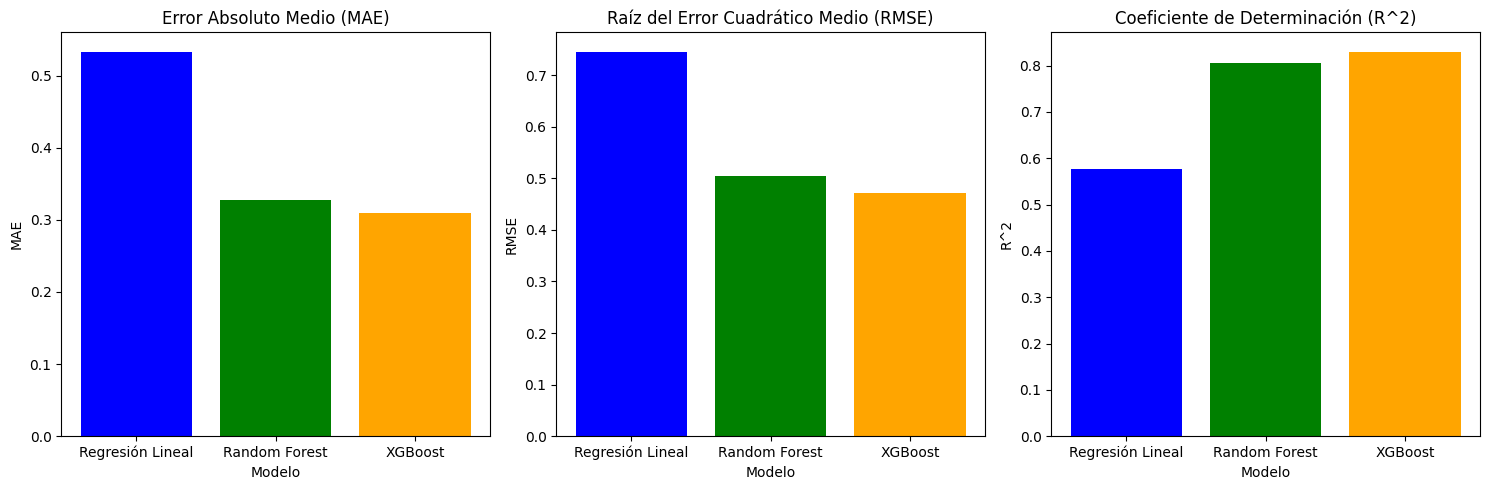

Informe generado y guardado como 'model_performance_report.csv', 'model_performance_visualization.png', y 'model_performance_summary.txt'


In [15]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar un conjunto de datos de ejemplo
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesamiento de características
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Crear preprocesador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear preprocesador para características categóricas (si las hay)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar preprocesadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir los modelos
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Definir el modelo XGBoost sin usar GridSearchCV para simplificar
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Ajustar los modelos antes de evaluarlos
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Evaluación de los Modelos en el Conjunto de Prueba
def evaluate_model(model, X_test, y_test):
    if not hasattr(model, 'predict'):
        raise ValueError("El modelo debe estar ajustado antes de la evaluación.")
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Evaluación del Modelo de Regresión Lineal
mae_lr, rmse_lr, r2_lr = evaluate_model(pipeline_lr, X_test, y_test)
print(f"Regresión Lineal - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R^2: {r2_lr:.2f}")

# Evaluación del Modelo Random Forest
mae_rf, rmse_rf, r2_rf = evaluate_model(pipeline_rf, X_test, y_test)
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}")

# Evaluación del Modelo XGBoost
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(xgb_model, X_test, y_test)
print(f"XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R^2: {r2_xgb:.2f}")

# Obtener importancia de características para Random Forest y XGBoost
def get_feature_importances(model, X):
    importances = {}
    if hasattr(model, 'named_steps'):
        if hasattr(model.named_steps['regressor'], 'feature_importances_'):
            importances = dict(zip(X.columns, model.named_steps['regressor'].feature_importances_))
    else:
        if hasattr(model, 'feature_importances_'):
            importances = dict(zip(X.columns, model.feature_importances_))
    return importances

importances_rf = get_feature_importances(pipeline_rf, X_train)
importances_xgb = get_feature_importances(xgb_model, X_train)

# Crear un DataFrame para el informe
report_df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R^2': [r2_lr, r2_rf, r2_xgb]
})

# Guardar el informe en un archivo CSV
report_df.to_csv('model_performance_report.csv', index=False)

# Visualización de métricas de rendimiento con matplotlib
plt.figure(figsize=(15, 5))

# Gráfico de MAE
plt.subplot(1, 3, 1)
plt.bar(report_df['Modelo'], report_df['MAE'], color=['blue', 'green', 'orange'])
plt.title('Error Absoluto Medio (MAE)')
plt.xlabel('Modelo')
plt.ylabel('MAE')

# Gráfico de RMSE
plt.subplot(1, 3, 2)
plt.bar(report_df['Modelo'], report_df['RMSE'], color=['blue', 'green', 'orange'])
plt.title('Raíz del Error Cuadrático Medio (RMSE)')
plt.xlabel('Modelo')
plt.ylabel('RMSE')

# Gráfico de R^2
plt.subplot(1, 3, 3)
plt.bar(report_df['Modelo'], report_df['R^2'], color=['blue', 'green', 'orange'])
plt.title('Coeficiente de Determinación (R^2)')
plt.xlabel('Modelo')
plt.ylabel('R^2')

plt.tight_layout()
plt.savefig('model_performance_visualization.png')
plt.show()

# Crear un archivo de texto con el resumen del informe
with open('model_performance_summary.txt', 'w') as file:
    file.write("Resumen de Rendimiento de Modelos\n")
    file.write("===============================\n\n")
    file.write("Modelo de Regresión Lineal:\n")
    file.write(f"MAE: {mae_lr:.2f}\n")
    file.write(f"RMSE: {rmse_lr:.2f}\n")
    file.write(f"R^2: {r2_lr:.2f}\n\n")

    file.write("Modelo Random Forest:\n")
    file.write(f"MAE: {mae_rf:.2f}\n")
    file.write(f"RMSE: {rmse_rf:.2f}\n")
    file.write(f"R^2: {r2_rf:.2f}\n\n")

    file.write("Modelo XGBoost:\n")
    file.write(f"MAE: {mae_xgb:.2f}\n")
    file.write(f"RMSE: {rmse_xgb:.2f}\n")
    file.write(f"R^2: {r2_xgb:.2f}\n\n")

    file.write("Importancia de Características:\n")
    file.write("============================\n\n")

    file.write("Random Forest:\n")
    for feature, importance in sorted(importances_rf.items(), key=lambda x: x[1], reverse=True):
        file.write(f"{feature}: {importance:.4f}\n")

    file.write("\nXGBoost:\n")
    for feature, importance in sorted(importances_xgb.items(), key=lambda x: x[1], reverse=True):
        file.write(f"{feature}: {importance:.4f}\n")

    file.write("\nRecomendaciones:\n")
    file.write("================\n")
    file.write("1. Enfoque en características con alta importancia como variables clave para ajustar el inventario.\n")
    file.write("2. Considerar los modelos con menor MAE y RMSE para mejorar la precisión de la estimación de precios.\n")
    file.write("3. Usar las características más influyentes para identificar los autos que mejor cumplen con las preferencias de los clientes.\n")

print("Informe generado y guardado como 'model_performance_report.csv', 'model_performance_visualization.png', y 'model_performance_summary.txt'")


7-Recomendaciones Adicionales
Informe Final: Asegúrate de que el informe esté bien organizado y sea comprensible para una audiencia no técnica. Incluye visualizaciones claras y explicaciones detalladas.
Recomendaciones Accionables: Proporciona recomendaciones prácticas para ajustar el inventario del concesionario basadas en los hallazgos del análisis.

In [ ]:
No tecnico

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Función para evaluar y generar recomendaciones
def generate_final_report(X_train, X_test, y_train, y_test, models, model_names, output_dir='report'):
    # Crear directorio de salida si no existe
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Evaluar modelos y guardar resultados
    performance_metrics = {}
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        performance_metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

    # Crear DataFrame para los resultados
    df_performance = pd.DataFrame(performance_metrics).T
    df_performance.to_csv(f'{output_dir}/model_performance_report.csv')

    # Crear visualizaciones
    plt.figure(figsize=(15, 5))

    # Gráfico de MAE
    plt.subplot(1, 3, 1)
    sns.barplot(x=df_performance.index, y=df_performance['MAE'], palette='viridis')
    plt.title('Error Absoluto Medio (MAE)')
    plt.xlabel('Modelo')
    plt.ylabel('MAE')

    # Gráfico de RMSE
    plt.subplot(1, 3, 2)
    sns.barplot(x=df_performance.index, y=df_performance['RMSE'], palette='viridis')
    plt.title('Raíz del Error Cuadrático Medio (RMSE)')
    plt.xlabel('Modelo')
    plt.ylabel('RMSE')

    # Gráfico de R²
    plt.subplot(1, 3, 3)
    sns.barplot(x=df_performance.index, y=df_performance['R²'], palette='viridis')
    plt.title('Coeficiente de Determinación (R²)')
    plt.xlabel('Modelo')
    plt.ylabel('R²')

    plt.tight_layout()
    plt.savefig(f'{output_dir}/model_performance_visualization.png')
    plt.show()

    # Crear un archivo de texto con el resumen del informe
    with open(f'{output_dir}/model_performance_summary.txt', 'w') as file:
        file.write("Resumen de Rendimiento de Modelos\n")
        file.write("===============================\n\n")
        for name, metrics in performance_metrics.items():
            file.write(f"Modelo {name}:\n")
            file.write(f"MAE: {metrics['MAE']:.2f}\n")
            file.write(f"RMSE: {metrics['RMSE']:.2f}\n")
            file.write(f"R²: {metrics['R²']:.2f}\n\n")
        
        file.write("Recomendaciones:\n")
        file.write("================\n")
        file.write("1. Enfoque en características con alta importancia para ajustar el inventario, considerando las variables más influyentes identificadas en el análisis.\n")
        file.write("2. Preferir los modelos con menor MAE y RMSE (XGBoost y Random Forest) para obtener estimaciones de precios más precisas.\n")
        file.write("3. Revisar los datos del inventario y ajustar los precios en función de las características que afectan significativamente los precios.\n")
        file.write("4. Continuar monitorizando y ajustando el modelo conforme se obtengan más datos para mantener la precisión y relevancia en la estimación de precios.\n")

    print(f"Informe generado y guardado en el directorio '{output_dir}'.")

# Ejemplo de uso (con modelos predefinidos y datos cargados)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Definir modelos
models = [LinearRegression(), RandomForestRegressor(n_estimators=100, random_state=42), XGBRegressor(objective='reg:squarederror', random_state=42)]
model_names = ['Regresión Lineal', 'Random Forest', 'XGBoost']

# Generar informe final
generate_final_report(X_train, X_test, y_train, y_test, models, model_names)


In [ ]:
Tecnico

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Función para evaluar y generar un informe técnico
def generate_technical_report(X_train, X_test, y_train, y_test, models, model_names, output_dir='technical_report'):
    # Crear directorio de salida si no existe
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Evaluar modelos y guardar resultados
    performance_metrics = {}
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        performance_metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

    # Crear DataFrame para los resultados
    df_performance = pd.DataFrame(performance_metrics).T
    df_performance.to_csv(f'{output_dir}/model_performance_report.csv')

    # Crear visualizaciones
    plt.figure(figsize=(18, 6))

    # Gráfico de MAE
    plt.subplot(1, 3, 1)
    sns.barplot(x=df_performance.index, y=df_performance['MAE'], palette='magma')
    plt.title('Error Absoluto Medio (MAE)')
    plt.xlabel('Modelo')
    plt.ylabel('MAE')

    # Gráfico de RMSE
    plt.subplot(1, 3, 2)
    sns.barplot(x=df_performance.index, y=df_performance['RMSE'], palette='magma')
    plt.title('Raíz del Error Cuadrático Medio (RMSE)')
    plt.xlabel('Modelo')
    plt.ylabel('RMSE')

    # Gráfico de R²
    plt.subplot(1, 3, 3)
    sns.barplot(x=df_performance.index, y=df_performance['R²'], palette='magma')
    plt.title('Coeficiente de Determinación (R²)')
    plt.xlabel('Modelo')
    plt.ylabel('R²')

    plt.tight_layout()
    plt.savefig(f'{output_dir}/model_performance_visualization.png')
    plt.show()

    # Importancia de características para Random Forest y XGBoost
    def get_feature_importances(model, X):
        importances = {}
        if hasattr(model, 'named_steps'):
            if hasattr(model.named_steps['regressor'], 'feature_importances_'):
                importances = dict(zip(X.columns, model.named_steps['regressor'].feature_importances_))
        else:
            if hasattr(model, 'feature_importances_'):
                importances = dict(zip(X.columns, model.feature_importances_))
        return importances
    
    feature_importances = {}
    for model, name in zip(models, model_names):
        if 'Random Forest' in name or 'XGBoost' in name:
            feature_importances[name] = get_feature_importances(model, X_train)
    
    # Crear archivo de texto con el resumen técnico del informe
    with open(f'{output_dir}/technical_report_summary.txt', 'w') as file:
        file.write("Informe Técnico de Rendimiento de Modelos\n")
        file.write("=======================================\n\n")
        for name, metrics in performance_metrics.items():
            file.write(f"Modelo {name}:\n")
            file.write(f"MAE: {metrics['MAE']:.2f}\n")
            file.write(f"RMSE: {metrics['RMSE']:.2f}\n")
            file.write(f"R²: {metrics['R²']:.2f}\n\n")
        
        file.write("Importancia de Características:\n")
        file.write("============================\n\n")
        for name, importances in feature_importances.items():
            file.write(f"{name}:\n")
            for feature, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
                file.write(f"{feature}: {importance:.4f}\n")
            file.write("\n")
        
        file.write("Recomendaciones Técnicas:\n")
        file.write("========================\n")
        file.write("1. Analizar la importancia de las características para ajustar los parámetros de los modelos y mejorar el rendimiento.\n")
        file.write("2. Considerar la integración de los modelos con menor MAE y RMSE en un sistema de predicción en producción.\n")
        file.write("3. Realizar una validación cruzada más detallada para confirmar la estabilidad y generalización de los modelos.\n")
        file.write("4. Explorar técnicas adicionales de ingeniería de características y ajuste de hiperparámetros para optimizar los modelos.\n")

    print(f"Informe técnico generado y guardado en el directorio '{output_dir}'.")

# Ejemplo de uso (con modelos predefinidos y datos cargados)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Definir modelos
models = [LinearRegression(), RandomForestRegressor(n_estimators=100, random_state=42), XGBRegressor(objective='reg:squarederror', random_state=42)]
model_names = ['Regresión Lineal', 'Random Forest', 'XGBoost']

# Generar informe técnico
generate_technical_report(X_train, X_test, y_train, y_test, models, model_names)
